# Preliminaries

In [1]:
# Load pandas for dataframes:
import pandas as pd

# For plotting:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Load SciPy for statistical testing:
import scipy


---

# Grouping: World Happiness Report 2016

In [2]:
whr_df_16 = pd.read_csv('WHR_2016.csv')

In [3]:
whr_df_16.shape

(157, 13)

In [4]:
whr_df_16[:3]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


## `size()` works as counting the N of observations in each group

In [5]:
whr_df_16.groupby('Region').size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        24
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 38
Western Europe                     21
dtype: int64

## `sum()`

In [6]:
whr_df_16.groupby('Region').sum()

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,,
Australia and New Zealand,New ZealandAustralia,17,14.647,14.505,14.789,2.80509,2.27754,1.68216,1.14984,0.74235,0.96808,5.02203
Central and Eastern Europe,Czech RepublicSlovakiaUzbekistanKazakhstanMold...,2275,155.750,153.227,158.273,30.37857,24.99380,18.31617,8.71532,2.55408,4.95603,65.83644
Eastern Asia,TaiwanJapanSouth KoreaHong KongChinaMongolia,403,33.745,33.301,34.189,7.66387,5.46257,4.84008,2.32369,0.71008,1.34138,11.40409
Latin America and Caribbean,Costa RicaPuerto RicoBrazilMexicoChilePanamaAr...,1160,146.442,143.442,149.442,23.84184,21.56237,14.70486,10.23951,2.54439,5.00228,68.54588
Middle East and Northern Africa,IsraelUnited Arab EmiratesSaudi ArabiaQatarAlg...,1484,102.335,100.223,104.447,21.64714,13.21724,11.71232,5.88561,3.06900,3.54823,43.25686
North America,CanadaUnited States,19,14.508,14.355,14.661,2.94811,2.14392,1.60660,1.05533,0.46197,0.85911,5.43267
Southeastern Asia,SingaporeThailandMalaysiaIndonesiaPhilippinesV...,720,48.050,47.246,48.854,8.06743,7.12580,5.05232,4.41111,1.33294,4.01535,18.04419
Southern Asia,BhutanPakistanNepalBangladeshSri LankaIndiaAfg...,782,31.943,31.395,32.491,4.62470,3.36486,3.17569,2.45018,0.73429,2.40297,15.19071
Sub-Saharan Africa,MauritiusSomaliaSomaliland RegionNigeriaZambia...,4927,157.184,152.946,161.422,18.02421,22.55891,9.11515,11.98612,4.57440,8.60124,82.32166


The above works, but the results might not make sense. Other descriptions are more appropriate.

## Selecting a column and using more functions

### `mean()`

In [7]:
whr_df_16.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64

### `median()`

In [8]:
whr_df_16.groupby('Region')['Happiness Score'].median()

Region
Australia and New Zealand          7.3235
Central and Eastern Europe         5.4880
Eastern Asia                       5.6465
Latin America and Caribbean        6.1260
Middle East and Northern Africa    5.3030
North America                      7.2540
Southeastern Asia                  5.2790
Southern Asia                      4.6430
Sub-Saharan Africa                 4.1300
Western Europe                     6.9070
Name: Happiness Score, dtype: float64

## `agg()`  when applying multiple functions to grouped data

In [9]:
whr_df_16.groupby('Region')['Happiness Score'].agg(['size', 'mean', 'median', 'min', 'max'])

,size,mean,median,min,max
Region,,,,,
Australia and New Zealand,2,7.323500,7.3235,7.313,7.334
Central and Eastern Europe,29,5.370690,5.4880,4.217,6.596
Eastern Asia,6,5.624167,5.6465,4.907,6.379
Latin America and Caribbean,24,6.101750,6.1260,4.028,7.087
Middle East and Northern Africa,19,5.386053,5.3030,3.069,7.267
North America,2,7.254000,7.2540,7.104,7.404
Southeastern Asia,9,5.338889,5.2790,3.907,6.739
Southern Asia,7,4.563286,4.6430,3.360,5.196
Sub-Saharan Africa,38,4.136421,4.1300,2.905,5.648


## Running my own function on the aggregated rows

In [10]:
def sum_up_capital_strings(list_of_strings):
    temporary = [x.upper() for x in list_of_strings]
    result = ''
    for x in temporary:
        result = result + x
    return result

In [11]:
whr_df_16.groupby('Region')['Country'].agg(sum_up_capital_strings)

Region
Australia and New Zealand                                       NEW ZEALANDAUSTRALIA
Central and Eastern Europe         CZECH REPUBLICSLOVAKIAUZBEKISTANKAZAKHSTANMOLD...
Eastern Asia                            TAIWANJAPANSOUTH KOREAHONG KONGCHINAMONGOLIA
Latin America and Caribbean        COSTA RICAPUERTO RICOBRAZILMEXICOCHILEPANAMAAR...
Middle East and Northern Africa    ISRAELUNITED ARAB EMIRATESSAUDI ARABIAQATARALG...
North America                                                    CANADAUNITED STATES
Southeastern Asia                  SINGAPORETHAILANDMALAYSIAINDONESIAPHILIPPINESV...
Southern Asia                      BHUTANPAKISTANNEPALBANGLADESHSRI LANKAINDIAAFG...
Sub-Saharan Africa                 MAURITIUSSOMALIASOMALILAND REGIONNIGERIAZAMBIA...
Western Europe                     DENMARKSWITZERLANDICELANDNORWAYFINLANDNETHERLA...
Name: Country, dtype: object

## Visualizing a distribution using `hist()`

In [12]:
whr_df_16['Economy (GDP per Capita)']

0      1.44178
1      1.52733
2      1.42666
3      1.57744
4      1.40598
        ...   
152    0.39499
153    0.38227
154    0.28123
155    0.74719
156    0.06831
Name: Economy (GDP per Capita), Length: 157, dtype: float64

<Axes: >

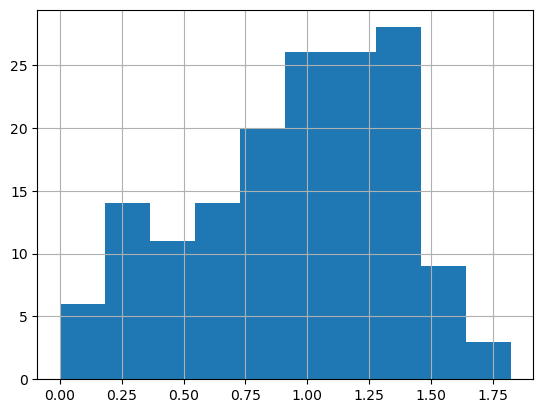

In [13]:
whr_df_16['Economy (GDP per Capita)'].hist()

## Quiz

* Suppose you want to group the countries into four groups based on the level of their GDP. A country is given "group_1" if its GDP is in the top quarter. A country is given "group_2" if its GDP is in the second quarter. A country is given "group_3" if its GDP is in the third quarter. A country is given "group_4" if its GDP is in the bottom quarter. 
* In whr_df_16, create a column called "GDP_four_groups" in which you have an indicator of which group a given country belongs to. 
* Print (1) the average and (2) the maximum happiness scores per GDP group.

*Hints*: 
* You might find it useful to use the `desc()` function.
* Yesterday, we saw the `.loc[]` operator was useful for setting column values

### Ahmed's longer solution

In [14]:
# Step 1: find the breakpoints of the groups/quarters of GDP
desc = whr_df_16['Economy (GDP per Capita)'].describe()
desc

count    157.000000
mean       0.953880
std        0.412595
min        0.000000
25%        0.670240
50%        1.027800
75%        1.279640
max        1.824270
Name: Economy (GDP per Capita), dtype: float64

In [15]:
gdp_75 = desc['75%']
gdp_50 = desc['50%']
gdp_25 = desc['25%']

In [16]:
print(gdp_75)
print(gdp_50)
print(gdp_25)


1.27964
1.0278
0.67024


In [17]:
# Step 2: add a label based on breakpoints

whr_df_16.loc[whr_df_16['Economy (GDP per Capita)'] >= gdp_75, 'gdp_four_groups'] = 'group_1'
whr_df_16


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gdp_four_groups
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,group_1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,group_1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,group_1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,group_1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,group_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,NaN
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,NaN
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,NaN
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,NaN


In [18]:
whr_df_16.loc[(whr_df_16['Economy (GDP per Capita)'] >= gdp_50) & (whr_df_16['Economy (GDP per Capita)'] < gdp_75), 'gdp_four_groups'] = 'group_2'
whr_df_16[:20]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gdp_four_groups
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,group_1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,group_1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,group_1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,group_1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,group_1
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,group_1
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749,group_1
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553,group_1
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,group_1
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734,group_1


In [19]:
whr_df_16.loc[(whr_df_16['Economy (GDP per Capita)'] < gdp_50) & (whr_df_16['Economy (GDP per Capita)'] >= gdp_25), 'gdp_four_groups'] = 'group_3'         
whr_df_16.loc[whr_df_16['Economy (GDP per Capita)'] < gdp_25, 'gdp_four_groups'] = 'group_4'

In [20]:
# Step 3: the actual summarization of Happiness Score by GDP groups
whr_df_16.groupby('gdp_four_groups')['Happiness Score'].agg(['mean', 'max'])

,mean,max
gdp_four_groups,,
group_1,6.648675,7.526
group_2,5.675795,7.087
group_3,5.057385,6.324
group_4,4.114410,5.440


### Robin's solution (adapted)

In [27]:
whr_df_16['GDP_four_groups'] = ''

whr_df_16.loc[whr_df_16['Economy (GDP per Capita)'] <= 0.67, 'GDP_four_groups'] = 'group_1'
whr_df_16.loc[(whr_df_16['Economy (GDP per Capita)'] >= 0.67) & (whr_df_16['Economy (GDP per Capita)'] < 1.03), 'GDP_four_groups'] = 'group_2'
whr_df_16.loc[(whr_df_16['Economy (GDP per Capita)'] >= 1.03) & (whr_df_16['Economy (GDP per Capita)'] < 1.27), 'GDP_four_groups'] = 'group_3'
whr_df_16.loc[(whr_df_16['Economy (GDP per Capita)'] >= 1.27) & (whr_df_16['Economy (GDP per Capita)'] > 2.00), 'GDP_four_groups'] = 'group_3'

# The last step will be similar to mine above...

### Gavin's solution

In [22]:
whr_df_16['group'] = pd.qcut(whr_df_16['Economy (GDP per Capita)'], 4, labels=False)
whr_df_16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gdp_four_groups,group
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,group_1,3
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,group_1,3
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,group_1,3
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,group_1,3
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,group_1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,group_4,0
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,group_4,0
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,group_4,0
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,group_3,1


In [23]:
# This is what Gavin wrote:
whr_df_16['group'] = whr_df_16['group'].apply(lambda x: 4 - x)

# Here's an alternative:
#whr_df_16['group'] = 4 - whr_df_16['group']

whr_df_16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gdp_four_groups,group
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,group_1,1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,group_1,1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,group_1,1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,group_1,1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,group_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,group_4,4
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,group_4,4
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,group_4,4
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,group_3,3


In [24]:
whr_df_16.groupby('group')['Happiness Score'].agg(['mean', 'max'])

,mean,max
group,,
1,6.677692,7.526
2,5.682769,7.087
3,5.069974,6.324
4,4.130400,5.440


### Maria's solution includes custom labels

In [25]:
# One-line setting of breakpoints using the pandas qcut() function
whr_df_16['GDP_four_groups'] = pd.qcut(whr_df_16['Economy (GDP per Capita)'], 4, labels=['group_4', 'group_3', 'group_2', 'group_1'])
whr_df_16


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,gdp_four_groups,group,GDP_four_groups
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,group_1,1,group_1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,group_1,1,group_1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,group_1,1,group_1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,group_1,1,group_1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,group_1,1,group_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,group_4,4,group_4
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,group_4,4,group_4
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,group_4,4,group_4
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,group_3,3,group_3


In [26]:
# And then do the following summarizations:
avg_happiness_per_group = whr_df_16.groupby('GDP_four_groups', observed=True)['Happiness Score'].mean()
max_happiness_per_group = whr_df_16.groupby('GDP_four_groups', observed=True)['Happiness Score'].max()

print("Average Happiness Scores:")
print(avg_happiness_per_group)

print("Maximum Happiness Scores:")
print(max_happiness_per_group)

Average Happiness Scores:
GDP_four_groups
group_4    4.130400
group_3    5.069974
group_2    5.682769
group_1    6.677692
Name: Happiness Score, dtype: float64
Maximum Happiness Scores:
GDP_four_groups
group_4    5.440
group_3    6.324
group_2    7.087
group_1    7.526
Name: Happiness Score, dtype: float64


---

# Grouping: Baltimore crime

Let's analyze a richer data set.

In [27]:
#bmc_df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
bmc_df = pd.read_csv('https://raw.githubusercontent.com/ahmedgc/2024_insead_python_workshop/main/BPD_Part_1_Victim_Based_Crime_Data.csv')

In [28]:
bmc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [29]:
bmc_df[:3]

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


---

## Inside and Outside (Hypothesis 1)

* H1: The type of weapon used varies with whether a crime occurs inside or outside. <b/>

In [30]:
bmc_df['Inside/Outside'].unique()

array(['I', 'O', 'Outside', nan, 'Inside'], dtype=object)

In [31]:
bmc_df['Inside/Outside'] = bmc_df['Inside/Outside'].str.replace("Inside", "I")
bmc_df['Inside/Outside'] = bmc_df['Inside/Outside'].str.replace("Outside", "O")

In [32]:
bmc_df['Inside/Outside'].unique()

array(['I', 'O', nan], dtype=object)

In [33]:
bmc_df['Weapon'].unique()

array(['KNIFE', nan, 'FIREARM', 'OTHER', 'HANDS'], dtype=object)

- <b> group the df by the two target columns <b>

In [34]:
bmc_df.groupby(['Weapon', 'Inside/Outside']).size()

Weapon   Inside/Outside
FIREARM  I                  5638
         O                 15733
HANDS    I                 30081
         O                 16806
KNIFE    I                  4395
         O                  4824
OTHER    I                  7020
         O                  6788
dtype: int64

- <b> `groupby()` and `sort_values()` vs. `value_counts()` <b>

In [35]:
# bmc_df.groupby('Description').size().sort_values(ascending=False)
bmc_df['Description'].value_counts()

Description
LARCENY                 60528
COMMON ASSAULT          45518
BURGLARY                42538
LARCENY FROM AUTO       36295
AGG. ASSAULT            27513
AUTO THEFT              26838
ROBBERY - STREET        17691
ROBBERY - COMMERCIAL     4141
ASSAULT BY THREAT        3503
SHOOTING                 2910
ROBBERY - RESIDENCE      2866
RAPE                     1637
HOMICIDE                 1559
ROBBERY - CARJACKING     1528
ARSON                    1464
Name: count, dtype: int64

In [36]:
bmc_df['District'].value_counts()

District
NORTHEASTERN    43006
SOUTHEASTERN    38291
SOUTHERN        31850
NORTHERN        31665
CENTRAL         31631
NORTHWESTERN    28061
SOUTHWESTERN    26092
EASTERN         23635
WESTERN         22218
Name: count, dtype: int64

## Quiz 

* Using `value_counts()` print ten neighborhoods that have experienced the most homicides.


In [37]:
bmc_df[bmc_df['Description']=='HOMICIDE']['Neighborhood'].value_counts()[:10]


Neighborhood
Sandtown-Winchester          47
Coldstream Homestead Mont    45
Central Park Heights         36
Belair-Edison                36
Upton                        35
Broadway East                34
Oliver                       32
Brooklyn                     31
Frankford                    30
East Baltimore Midway        27
Name: count, dtype: int64

## More analysis


In [38]:
homicides_df = bmc_df[bmc_df['Description'] == 'HOMICIDE']
homicides_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
6,09/02/2017,21:15:00,1F,3400 HARMONY CT,HOMICIDE,O,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,"(39.2820200000, -76.5682700000)",Street,1
17,09/02/2017,18:08:00,1F,1200 E LAFAYETTE AV,HOMICIDE,O,FIREARM,343.0,EASTERN,Oliver,-76.60246,39.31038,"(39.3103800000, -76.6024600000)",Street,1
309,08/30/2017,21:47:00,1F,100 S HIGHLAND AV,HOMICIDE,O,FIREARM,222.0,SOUTHEASTERN,Patterson Park Neighborho,-76.56937,39.29125,"(39.2912500000, -76.5693700000)",Street,1
331,08/30/2017,19:39:00,1F,500 RICHWOOD AV,HOMICIDE,O,FIREARM,524.0,NORTHERN,Richnor Springs,-76.60955,39.34705,"(39.3470500000, -76.6095500000)",Street,1
332,08/30/2017,19:39:00,1F,500 RICHWOOD AV,HOMICIDE,O,FIREARM,524.0,NORTHERN,Richnor Springs,-76.60955,39.34705,"(39.3470500000, -76.6095500000)",Street,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275629,01/08/2012,03:52:00,1F,4100 MARIBAN CT,HOMICIDE,I,FIREARM,913.0,SOUTHERN,Brooklyn,-76.59802,39.22913,"(39.2291300000, -76.5980200000)",Dwelling,1
275800,01/06/2012,19:01:00,1F,800 N MONTFORD AV,HOMICIDE,O,FIREARM,323.0,EASTERN,Milton-Montford,-76.58384,39.30021,"(39.3002100000, -76.5838400000)",Street,1
275985,01/05/2012,09:08:00,1K,2600 E BIDDLE ST,HOMICIDE,I,KNIFE,323.0,EASTERN,Biddle Street,-76.58042,39.30481,"(39.3048100000, -76.5804200000)",Dwelling,1
276158,01/03/2012,21:45:00,1F,4000 EDGEWOOD RD,HOMICIDE,O,FIREARM,643.0,NORTHWESTERN,East Arlington,-76.66913,39.33180,"(39.3318000000, -76.6691300000)",NaN,1


Here's a count of homicides per neighborhood, including the district to which each neighborhood belongs:

In [39]:
homicides_per_neighborhood_and_type_df = homicides_df.groupby(['District', 'Neighborhood', 'Description'])['Total Incidents'].sum().reset_index()
homicides_per_neighborhood_and_type_df

,District,Neighborhood,Description,Total Incidents
0,CENTRAL,Charles North,HOMICIDE,3
1,CENTRAL,Downtown,HOMICIDE,17
2,CENTRAL,Druid Heights,HOMICIDE,9
3,CENTRAL,Greenmount West,HOMICIDE,3
4,CENTRAL,Heritage Crossing,HOMICIDE,5
...,...,...,...,...
216,WESTERN,Penn North,HOMICIDE,25
217,WESTERN,Penrose/Fayette Street Ou,HOMICIDE,22
218,WESTERN,Poppleton,HOMICIDE,16
219,WESTERN,Rosemont Homeowners/Tenan,HOMICIDE,3



Let's figure out which neighborhood in each district has seen the most homicides:

In [40]:
# Approach 1
homicides_per_neighborhood_and_type_df.sort_values(by='Total Incidents', ascending=False).drop_duplicates('District')

,District,Neighborhood,Description,Total Incidents
220,WESTERN,Sandtown-Winchester,HOMICIDE,47
43,NORTHEASTERN,Coldstream Homestead Mont,HOMICIDE,45
100,NORTHWESTERN,Central Park Heights,HOMICIDE,36
15,CENTRAL,Upton,HOMICIDE,35
20,EASTERN,Broadway East,HOMICIDE,34
150,SOUTHERN,Brooklyn,HOMICIDE,31
166,SOUTHWESTERN,Allendale,HOMICIDE,15
140,SOUTHEASTERN,McElderry Park,HOMICIDE,14
75,NORTHERN,Greenspring,HOMICIDE,10


In [41]:
# Approach 2
homicides_per_neighborhood_and_type_df.loc[homicides_per_neighborhood_and_type_df.groupby(["District"])["Total Incidents"].idxmax()]      

,District,Neighborhood,Description,Total Incidents
15,CENTRAL,Upton,HOMICIDE,35
20,EASTERN,Broadway East,HOMICIDE,34
43,NORTHEASTERN,Coldstream Homestead Mont,HOMICIDE,45
67,NORTHERN,Better Waverly,HOMICIDE,10
100,NORTHWESTERN,Central Park Heights,HOMICIDE,36
140,SOUTHEASTERN,McElderry Park,HOMICIDE,14
150,SOUTHERN,Brooklyn,HOMICIDE,31
166,SOUTHWESTERN,Allendale,HOMICIDE,15
220,WESTERN,Sandtown-Winchester,HOMICIDE,47


---

## Weather and Crimes (Hypothesis 2)

* Although archival data like `bmc_df` does not provide direct evidence for causality, its richness allows us to indirectly test prior findings and thus corroborate them. 
* For instance, the claim that warmer weather can make us more violent can be supported by examining `bmc_df`. 
* Let's check out this article first: [A hotter world will be a more violent world.](https://news.trust.org/item/20210811162128-r7vkq)
* Do you think you can (at least indirectly) test the claim with the current data? 
* If so, what's your approach? 

In [42]:
bmc_df[:3]

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,O,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


In [43]:
bmc_df['CrimeDate'][:1][0]

'09/02/2017'

In [44]:
bmc_df['CrimeDate_dt'] = pd.to_datetime(bmc_df.CrimeDate, format="%m/%d/%Y")

In [45]:
bmc_df['CrimeDate_dt']

0        2017-09-02
1        2017-09-02
2        2017-09-02
3        2017-09-02
4        2017-09-02
            ...    
276524   2012-01-01
276525   2012-01-01
276526   2012-01-01
276527   2012-01-01
276528   2012-01-01
Name: CrimeDate_dt, Length: 276529, dtype: datetime64[ns]

In [46]:
bmc_df['CrimeDate_dt'][:1][0].month

9

In [47]:
bmc_df['year'] = bmc_df['CrimeDate_dt'].apply(lambda x: x.year)
bmc_df['month'] = bmc_df['CrimeDate_dt'].apply(lambda x: x.month)

In [48]:
bmc_df['month']

0         9
1         9
2         9
3         9
4         9
         ..
276524    1
276525    1
276526    1
276527    1
276528    1
Name: month, Length: 276529, dtype: int64

In [49]:
bmc_df['year']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
276524    2012
276525    2012
276526    2012
276527    2012
276528    2012
Name: year, Length: 276529, dtype: int64

In [50]:
# bmc_df.groupby(['year', 'month']).size().sort_values(ascending=False)[:10]
bmc_df.value_counts(subset=['month', 'year'])

month  year
10     2016    4878
7      2015    4779
6      2015    4662
8      2015    4659
5      2012    4648
               ... 
2      2013    3201
       2014    2890
       2016    2888
       2015    2652
9      2017     162
Name: count, Length: 69, dtype: int64

In [51]:
# bmc_df.groupby('year').size().sort_values(ascending=False)
bmc_df['year'].value_counts()

year
2012    49575
2013    49571
2015    48841
2016    48749
2014    45969
2017    33824
Name: count, dtype: int64

In [52]:
# bmc_df.groupby('month').size().sort_values(ascending=False)
bmc_df['month'].value_counts()

month
8     26534
7     26462
5     26412
6     26375
4     23503
1     22788
10    22142
3     22081
9     21587
11    20044
12    19927
2     18674
Name: count, dtype: int64

**Suppose you hypothesize that some types of violent crimes are more sensitive to weather:**
>- 'SHOOTING'
>- 'AGG. ASSAULT'
>- 'COMMON ASSAULT'
>- 'HOMICIDE'
>- 'ROBBERY - STREET'
>- 'RAPE'
    
- What would you do to gauge whether the hypothesis is worth exploring?

In [53]:
bmc_df['Description'].unique()

array(['ROBBERY - RESIDENCE', 'AUTO THEFT', 'SHOOTING', 'AGG. ASSAULT',
       'COMMON ASSAULT', 'BURGLARY', 'HOMICIDE', 'ROBBERY - STREET',
       'ROBBERY - COMMERCIAL', 'LARCENY', 'LARCENY FROM AUTO', 'ARSON',
       'ROBBERY - CARJACKING', 'ASSAULT BY THREAT', 'RAPE'], dtype=object)

In [54]:
dir_violence = ['SHOOTING', 'AGG. ASSAULT', 'COMMON ASSAULT', 'HOMICIDE', 'ROBBERY - STREET', 'RAPE']

bmc_df[bmc_df['Description'].isin(dir_violence)]['month'].value_counts()

month
5     9729
6     9243
8     9021
7     9014
4     8607
3     8227
1     7799
9     7598
10    7274
2     6863
12    6769
11    6684
Name: count, dtype: int64

In [55]:
bmc_df[~bmc_df['Description'].isin(dir_violence)]['month'].value_counts()

month
8     17513
7     17448
6     17132
5     16683
1     14989
4     14896
10    14868
9     13989
3     13854
11    13360
12    13158
2     11811
Name: count, dtype: int64

---

# Visualization: Baltimore crime

## Built-in functions in Pandas

In [56]:
gb1 = bmc_df.groupby(['year']).size()

In [57]:
gb1

year
2012    49575
2013    49571
2014    45969
2015    48841
2016    48749
2017    33824
dtype: int64

<Axes: xlabel='year'>

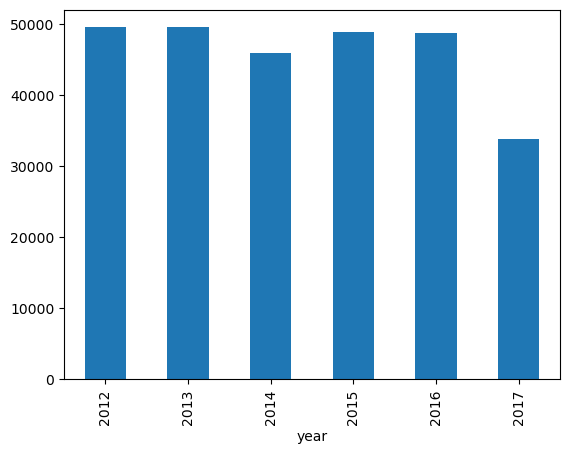

In [58]:
gb1.plot(kind='bar')

<Axes: xlabel='year'>

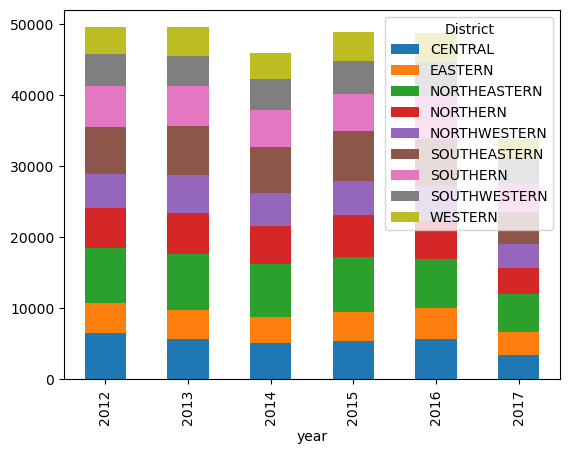

In [59]:
gb2 = bmc_df.groupby(['year', "District"]).size()
gb2.unstack().plot(kind='bar', stacked=True)

## Seaborn

In [60]:
gb1_for_sns = pd.DataFrame(gb1).reset_index().rename(columns={0:"count"})

In [61]:
gb1_for_sns

,year,count
0,2012,49575
1,2013,49571
2,2014,45969
3,2015,48841
4,2016,48749
5,2017,33824


<Axes: xlabel='year', ylabel='count'>

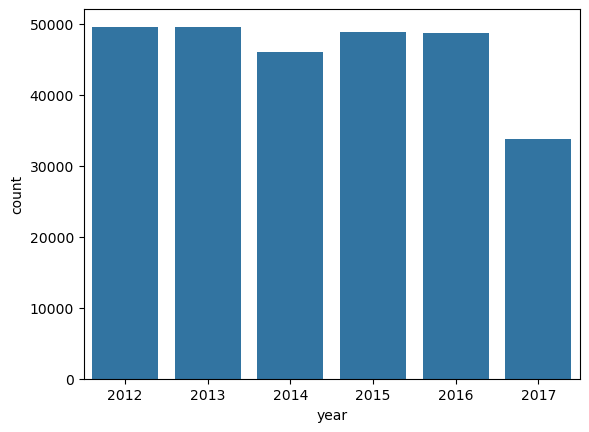

In [62]:
sns.barplot(data=pd.DataFrame(gb1_for_sns).reset_index(), x='year', y='count')

Drop 2017, the outlier year:

In [63]:
bmc_df_new = bmc_df[bmc_df.year!=2017]

In [64]:
bmc_df_new.year.unique()

array([2015, 2016, 2013, 2012, 2014])

### Yearly Crime Occurrences By District

In [65]:
gb3 = bmc_df_new.groupby(['year', "District"]).size().reset_index()
gb3.rename(columns={0:'count'}, inplace=True)

In [66]:
gb3.head()

,year,District,count
0,2012,CENTRAL,6496
1,2012,EASTERN,4235
2,2012,NORTHEASTERN,7728
3,2012,NORTHERN,5586
4,2012,NORTHWESTERN,4886


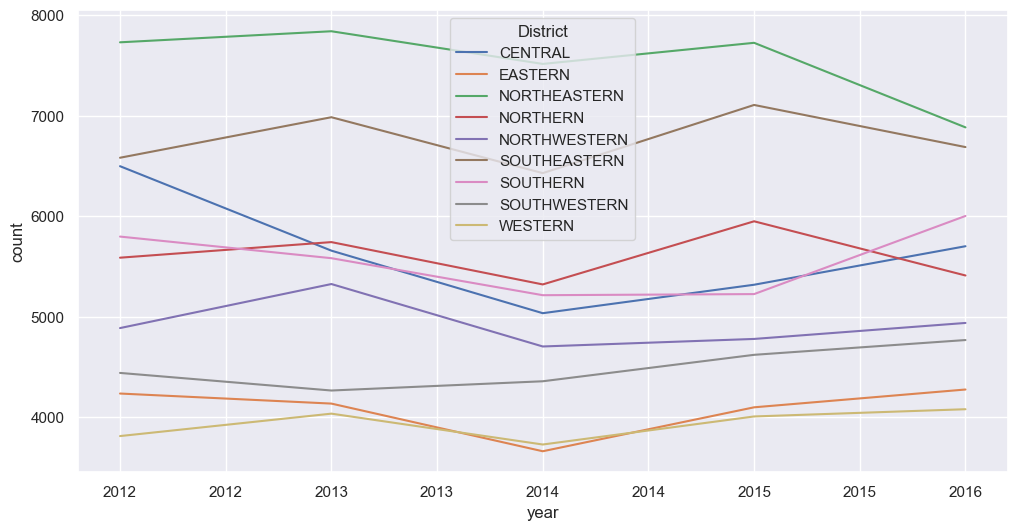

In [67]:
sns.set(rc={'figure.figsize':(12, 6)}) 

ax = sns.lineplot(data=gb3, x='year', y='count', hue='District')

# Funcformatter is an imported function; we apply it to the labels:
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

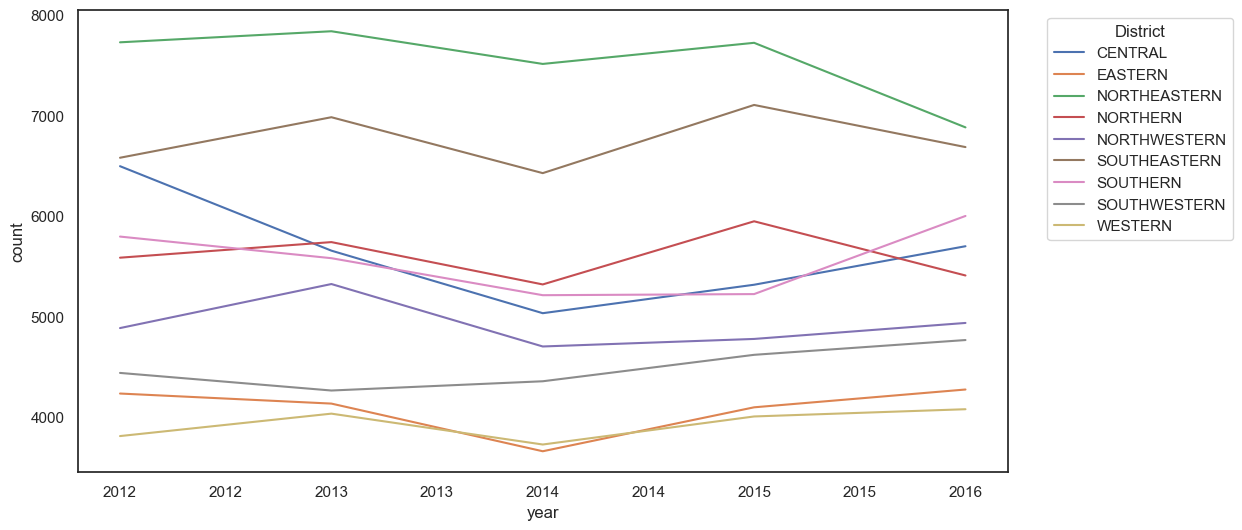

In [69]:
# Added:
sns.set_theme(style="white")

ax = sns.lineplot(data=gb3, x='year', y='count', hue='District')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Added:
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.25, 1))

### What about monthly patterns?

In [70]:
gb4 = bmc_df_new.groupby(['month', "District"]).size().reset_index()
gb4.rename(columns={0:'count'}, inplace=True)
gb4

,month,District,count
0,1,CENTRAL,1904
1,1,EASTERN,1645
2,1,NORTHEASTERN,2936
3,1,NORTHERN,2010
4,1,NORTHWESTERN,1988
...,...,...,...
103,12,NORTHWESTERN,2118
104,12,SOUTHEASTERN,2827
105,12,SOUTHERN,2168
106,12,SOUTHWESTERN,1927


<Axes: xlabel='month', ylabel='count'>

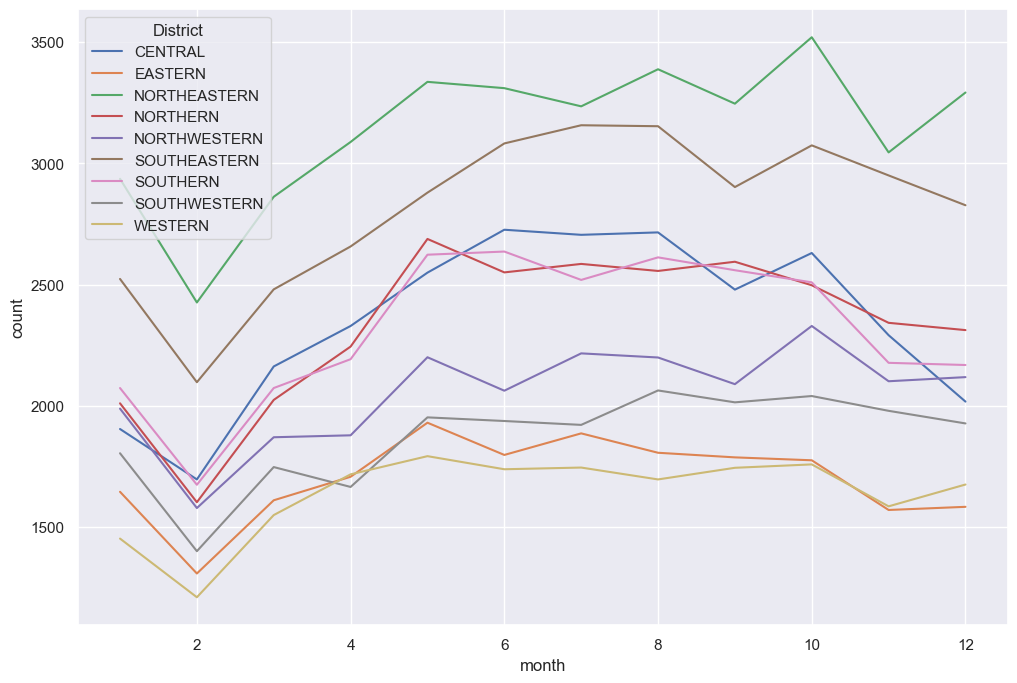

In [71]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.lineplot(data=gb4, x='month', y='count',hue='District' )

---

# Visualization: McDonald's

In [72]:
md_menu_df = pd.read_csv('menu_mcdonalds.csv')

In [73]:
md_menu_df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [74]:
md_menu_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [75]:
md_menu_df.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,...,57,19,1,5,51,10,10,0,30,4


## Scatter plot

In [76]:
md_menu_df['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

### Using the built-in `plot()` in Pandas

<Axes: xlabel='Sodium (% Daily Value)', ylabel='Cholesterol (% Daily Value)'>

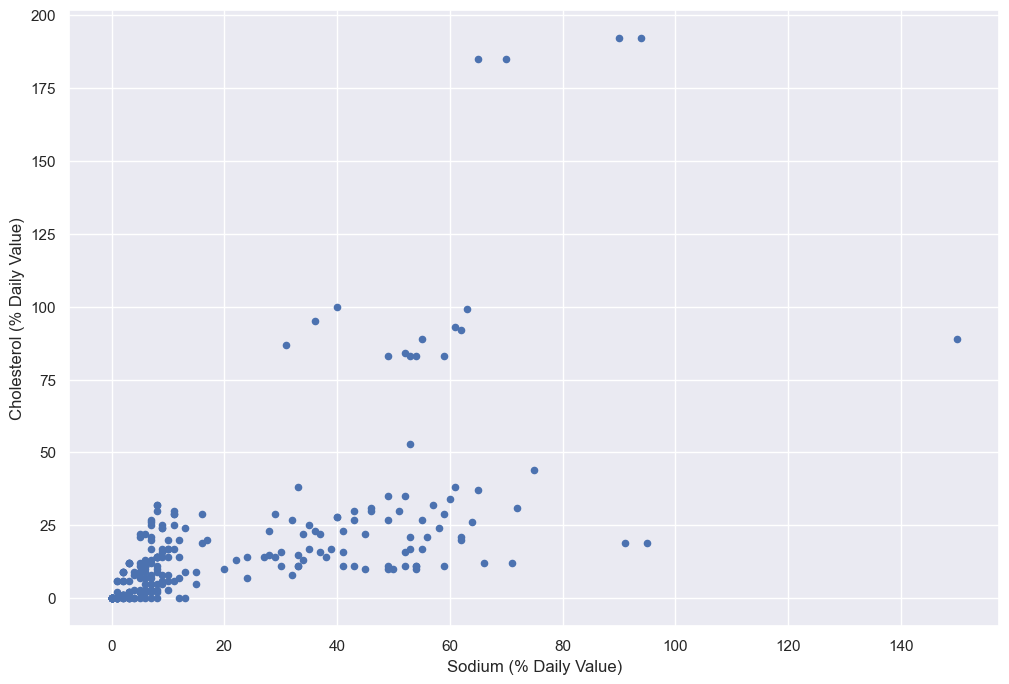

In [77]:
md_menu_df.plot(kind='scatter', x='Sodium (% Daily Value)', y="Cholesterol (% Daily Value)")

### Seaborn's reg plot

<Axes: xlabel='Sodium (% Daily Value)', ylabel='Cholesterol (% Daily Value)'>

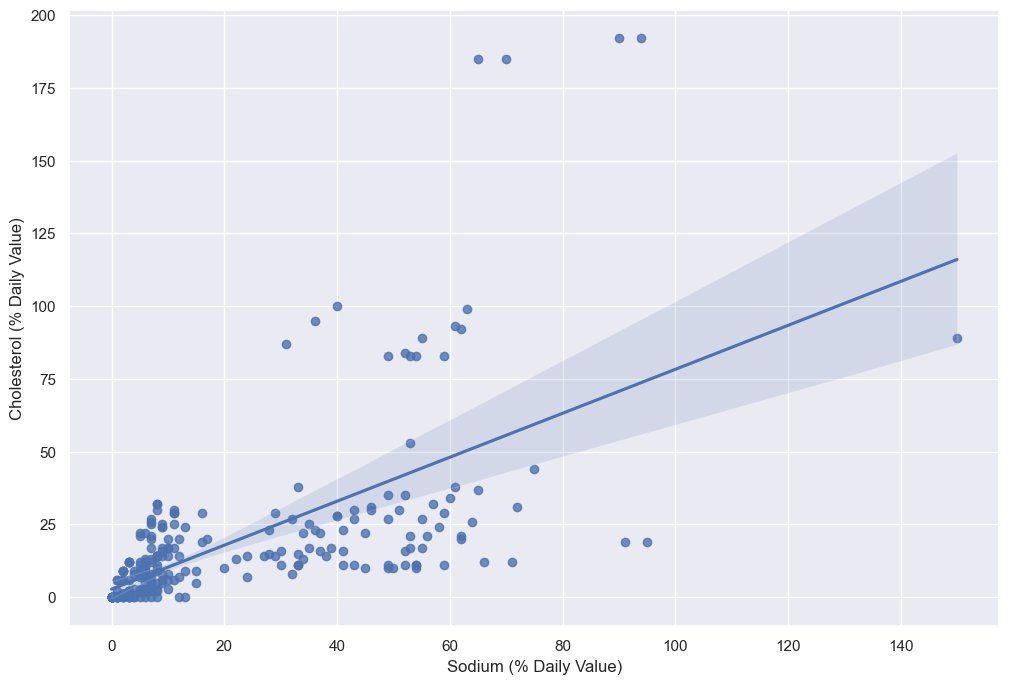

In [78]:
sns.regplot(data=md_menu_df, x='Sodium (% Daily Value)', y="Cholesterol (% Daily Value)")

### Using Seaborn's `FacetGrid`

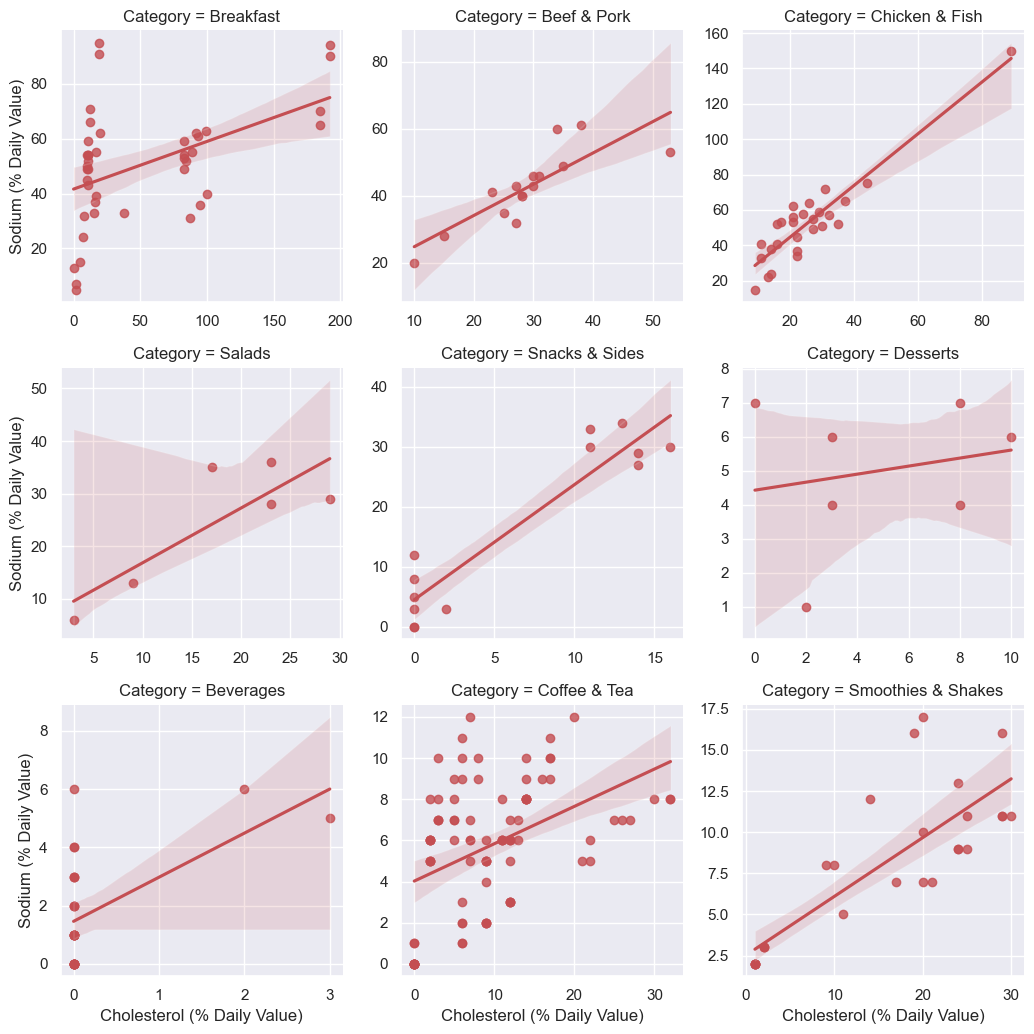

In [79]:
g = sns.FacetGrid(md_menu_df, col='Category', col_wrap=3, height=3.5, sharex=False, sharey=False)
g.map(sns.regplot, "Cholesterol (% Daily Value)", "Sodium (% Daily Value)", color='r')

---

# Statistical Testing: Starbucks

In [80]:
sb_df = pd.read_csv('menu_starbucks.csv')

## Histogram by Pandas

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Trans Fat (g) '}>,
        <Axes: title={'center': 'Saturated Fat (g)'}>],
       [<Axes: title={'center': ' Sodium (mg)'}>,
        <Axes: title={'center': ' Total Carbohydrates (g) '}>,
        <Axes: title={'center': 'Cholesterol (mg)'}>],
       [<Axes: title={'center': ' Dietary Fibre (g)'}>,
        <Axes: title={'center': ' Sugars (g)'}>,
        <Axes: title={'center': ' Protein (g) '}>]], dtype=object)

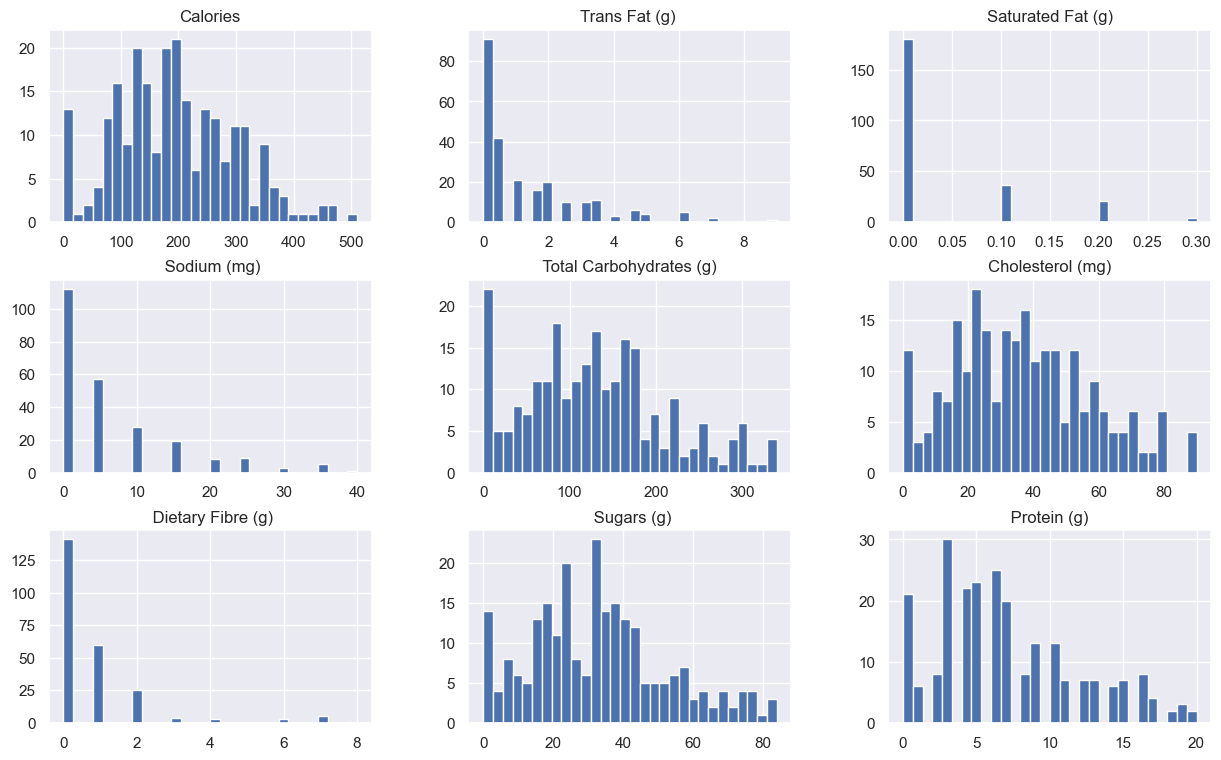

In [81]:
sb_df.hist(figsize=(15,9), bins=30)

## One-sample t-test of a population mean, with SciPy


This is the sample mean for calorie count:

In [82]:
sb_df['Calories'].mean()

193.87190082644628

What about the true population mean?

Is it equal to zero?

In this test, the Null hypothesis is that the population mean is equal to zero.

In [83]:
scipy.stats.ttest_1samp(sb_df['Calories'], popmean=0)

TtestResult(statistic=29.319873148465472, pvalue=1.89552485705049e-81, df=241)

The t-stat has a high magnitude, and the p-value is very low. We can say with high certainty that the Null hypothesis is rejected.

Is the population mean equal to 200? In this test, the Null hypothesis is that the population mean is 200.

In [84]:
scipy.stats.ttest_1samp(sb_df['Calories'], popmean=200)

TtestResult(statistic=-0.9267722121869325, pvalue=0.3549719810704973, df=241)

This time, the t-stat has a low magnitude, and the p-value is high. So we do not reject the Null. The population mean might be 200.

## Two-sample t-test for difference across populations, with SciPy

In [85]:
sb_df.Beverage_category.value_counts()

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: count, dtype: int64

Let's compare the average (mean) calorie count of the two largest categories of drinks: Classic Espresso drinks versus Tazo Tea drinks.

In [86]:
cls_esp_caff = sb_df[sb_df['Beverage_category'] == 'Classic Espresso Drinks']['Caffeine (mg)'].astype(int)
cls_esp_caff[0:10]

4      75
5      75
6      75
7      75
8      75
9      75
10    150
11    150
12    150
13    150
Name: Caffeine (mg), dtype: int64

In [87]:
# Running this line will fail:
tz_tea_caff = sb_df[sb_df['Beverage_category'] == 'Tazo® Tea Drinks']['Caffeine (mg)'].astype(int)


ValueError: invalid literal for int() with base 10: 'Varies'

In [93]:
# Investigate:
sb_df[sb_df['Beverage_category'] == 'Tazo® Tea Drinks']['Caffeine (mg)']

102    Varies
103    Varies
104    Varies
105    Varies
106        50
107        50
108        50
109        70
110        70
111        70
112        95
113        95
114        95
115       120
116       120
117       120
118        25
119        25
120        25
121        55
122        55
123        55
124        80
125        80
126        80
127       110
128       110
129       110
130    varies
131    varies
132    varies
133    varies
134    varies
135    varies
136    varies
137    varies
138    varies
139    varies
140    varies
141    varies
142         0
143         0
144         0
145         0
146         0
147         0
148         0
149         0
150         0
151         0
152         0
153         0
Name: Caffeine (mg), dtype: object

In [94]:
# Exclude the non-integer entries before forcing a conversion:
tz_tea_caff = sb_df[
    (sb_df['Beverage_category'] == 'Tazo® Tea Drinks')
    & (sb_df['Caffeine (mg)'] != 'varies') & (sb_df['Caffeine (mg)'] != 'Varies')
]['Caffeine (mg)'].astype(int)
tz_tea_caff

106     50
107     50
108     50
109     70
110     70
111     70
112     95
113     95
114     95
115    120
116    120
117    120
118     25
119     25
120     25
121     55
122     55
123     55
124     80
125     80
126     80
127    110
128    110
129    110
142      0
143      0
144      0
145      0
146      0
147      0
148      0
149      0
150      0
151      0
152      0
153      0
Name: Caffeine (mg), dtype: int64

(array([25.,  3.,  0.,  0.,  0.,  0., 22.,  0.,  3.,  3.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 75.  ,  86.25,  97.5 , 108.75, 120.  , 131.25, 142.5 , 153.75,
        165.  , 176.25, 187.5 , 198.75, 210.  , 221.25, 232.5 , 243.75,
        255.  , 266.25, 277.5 , 288.75, 300.  ]),
 <BarContainer object of 20 artists>)

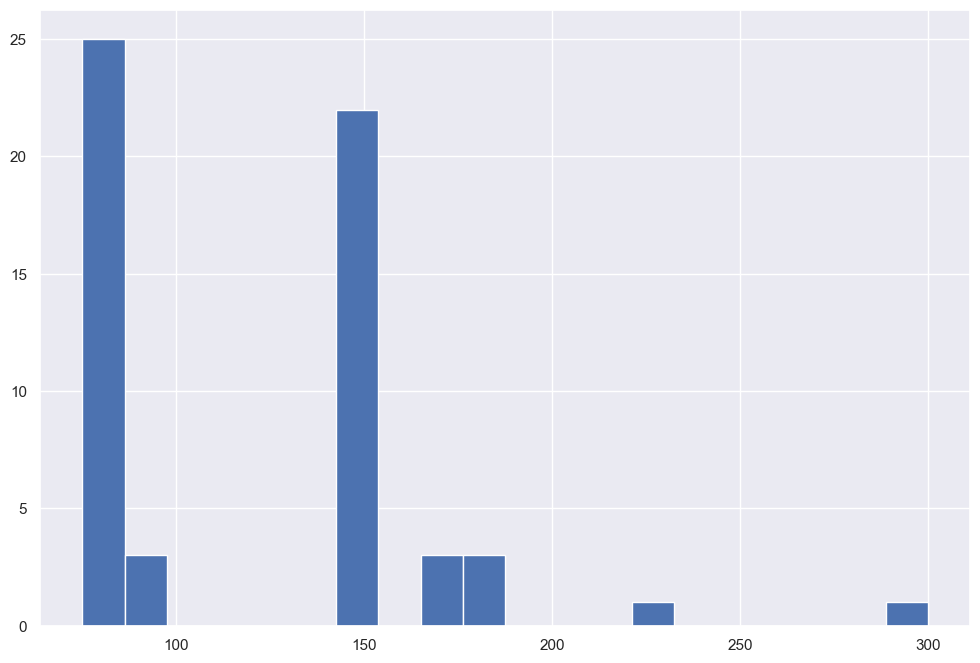

In [95]:
plt.hist(cls_esp_caff, bins=20)

(array([12.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  3.,  3.,  0.,  3.,  0.,
         3.,  0.,  3.,  0.,  0.,  3.,  3.]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120.]),
 <BarContainer object of 20 artists>)

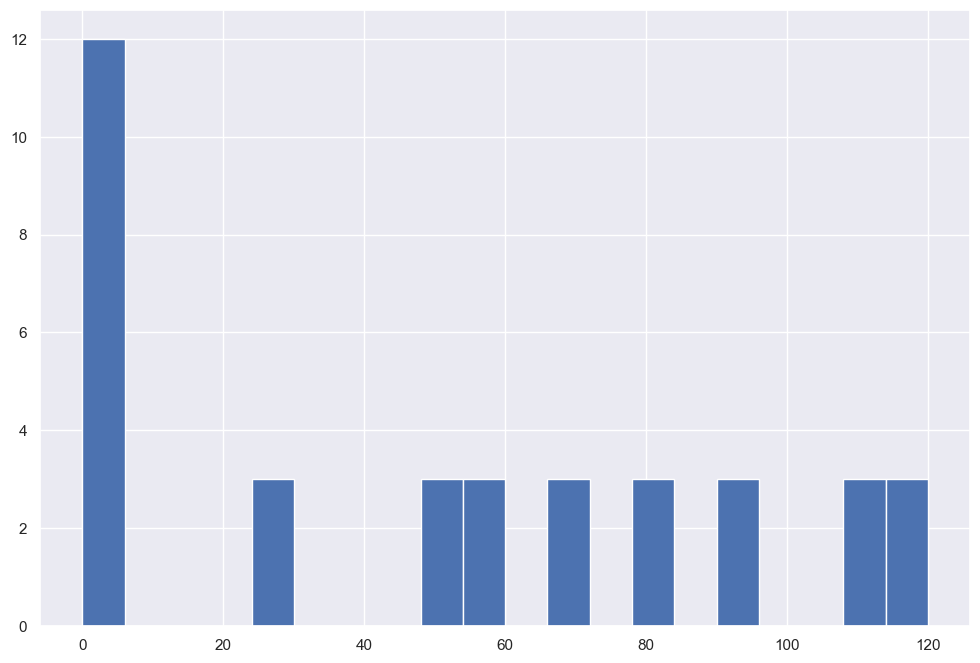

In [96]:
plt.hist(tz_tea_caff, bins=20)

In [97]:
cls_esp_caff.mean()

122.06896551724138

In [98]:
tz_tea_caff.mean()

50.416666666666664

The Null hypothesis here is that the two population means are identical:

In [99]:
scipy.stats.ttest_ind(cls_esp_caff, tz_tea_caff)

TtestResult(statistic=7.236165642727599, pvalue=1.3511436748833627e-10, df=92.0)

From the large t-stat and small p-value, the two means do seem to be significantly different from one another.

Instead of a two-sided hypothesis, let's test some one-sided hypotheses.

Here, the Alternative Hypothesis is the first is less than the second; i.e. the Null hypothesis is that the first is greater than or equal to the second:

In [100]:
scipy.stats.ttest_ind(cls_esp_caff, tz_tea_caff, alternative='less')

TtestResult(statistic=7.236165642727599, pvalue=0.9999999999324428, df=92.0)

Here, the Alternative Hypothesis is the first is greater than the second; i.e. the Null hypothesis is that the first is less than or equal to the second:

In [101]:
scipy.stats.ttest_ind(cls_esp_caff, tz_tea_caff, alternative='greater')

TtestResult(statistic=7.236165642727599, pvalue=6.755718374416813e-11, df=92.0)

---

# Quizzes, using Starbucks data

## Quiz: Formulate and test your own hypothesis

In [ ]:
# TODO: There are many other hypotheses one could test...
sb_df.columns

## Quiz: Visualization

* Suppose we aim to examine the relationship between Trans Fat and Saturated Fat in each category.
* Plot a FacetGrid of the nine values of Beverage Category wherein each subplot shows the relational pattern between the two variables.


In [ ]:
# TODO, using the following:
sb_df[['Beverage_category', 'Trans Fat (g) ', 'Saturated Fat (g)']]